Import public packages and functions

In [1]:
import os
import importlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import seaborn as sns
import math
import statistics as stat
import json
from scipy import interp

Import Cross Validation Packages

In [2]:
from sklearn.model_selection import LeaveOneOut, LeaveOneGroupOut
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.preprocessing import LabelEncoder

Import Classifiers and Feature Selection Algorithms

In [23]:
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# from sklearn.preprocessing import LabelEncoder
# import metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, roc_curve, auc

from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import MinMaxScaler

In [4]:
def get_repo_path_in_notebook():
    """
    Finds path of repo from Notebook.
    Start running this once to correctly find
    other modules/functions
    """
    path = os.getcwd()
    repo_name = 'ultraleap_analysis'

    while path[-len(repo_name):] != 'ultraleap_analysis':

        path = os.path.dirname(path)

    return path

In [5]:
repo_path = get_repo_path_in_notebook()
code_path = os.path.join(repo_path, 'code')
os.chdir(code_path)

Import own functions

In [6]:
import sig_processing.extract_scores as sc_ext
import sig_processing.predict as pred
import plotting.boxplotting as bxplt
import statistic.stat_analysis as statis

### 1. Loading features (X) and scores (y)

Load features from csv

In [278]:
# define task
folder = 'patientdata'
task = 'ft'
feat_file = 'features'
# feat_file = 'features'


feat_df_path = os.path.join(
    repo_path,
    'EDA',
    folder,
    task, 
    f'{feat_file}.csv'
    )

X_df = pd.read_csv(feat_df_path, index_col=0)
feat_cols = X_df.iloc[:,1:].columns
print(len(feat_cols))


26


Load scores/labels

In [279]:
y_with_nan = sc_ext.get_labels_for_feat_df(X_df)
y = np.array([i for i in y_with_nan if not np.isnan(i)])

No scores for block ('b1', 'ul020', 'm1s1', 'dt', 'ft', 'lh') or this combination does not exist
No scores for block ('b2', 'ul020', 'm1s1', 'dt', 'ft', 'lh') or this combination does not exist
No scores for block ('b3', 'ul020', 'm1s1', 'dt', 'ft', 'lh') or this combination does not exist


Remove non-scored/non-existing rows/blocks

In [280]:
try:
    X_df = sc_ext.remove_non_score_rows(X_df, y_with_nan)
except KeyError:
    print('Non-scored/non-existing rows/blocks have already been scored.')
X_df

,file,num_events,mean_max_dist,sd_max_dist,coef_var_max_dist,slope_max_dist,decr_max_dist,max_open_vel,mean_open_vel,sd_open_vel,...,mean_tap_dur,sd_tap_dur,coef_var_tap_dur,slope_tap_dur,mean_rms,sd_rms,slope_rms,sum_rms,jerkiness,entropy
0,b1_ul001_m1_vr_ft_right.json,26.0,0.139815,0.006028,0.043111,-0.000533,0.004762,1.480322,0.887650,0.298676,...,0.419996,0.143758,0.342284,0.002407,0.070732,0.007275,-0.000468,1.839024,10.092632,6.683361
1,b2_ul001_m1_vr_ft_right.json,31.0,0.134651,0.004303,0.031957,0.000012,-0.021412,1.335573,0.955032,0.209491,...,0.360834,0.031273,0.086668,-0.000461,0.077003,0.005023,-0.000076,2.387097,7.849825,6.683361
2,b1_ul001_m1_dt_ft_right.json,20.0,0.085116,0.019407,0.228008,-0.001458,-0.319352,0.789643,0.450597,0.181050,...,0.485763,0.091018,0.187371,-0.000741,0.050737,0.006412,-0.000528,1.014738,11.774737,6.683361
3,b2_ul001_m1_dt_ft_right.json,26.0,0.085684,0.016888,0.197097,-0.001391,-0.185258,0.832657,0.438804,0.196246,...,0.435584,0.092162,0.211582,0.006528,0.049935,0.007470,-0.000400,1.298314,11.029105,6.673298
4,b3_ul001_m1_dt_ft_right.json,24.0,0.099948,0.010456,0.104615,-0.000799,-0.153763,1.697059,0.388181,0.312169,...,0.425662,0.081414,0.191265,-0.002156,0.059300,0.004795,-0.000207,1.423192,10.973734,6.681626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,b3_ul019_m0s0_dt_ft_left.json,9.0,0.044174,0.008587,0.194383,-0.000580,-0.355184,0.268989,0.139823,0.070897,...,0.438048,0.095590,0.218218,0.002086,0.028188,0.005371,0.001271,0.253693,6.500339,6.643790
196,b1_ul019_m1s0_vr_ft_left.json,4.0,0.022558,0.003747,0.166116,-0.003189,-0.316802,0.084076,0.047405,0.029834,...,1.338665,0.629601,0.470320,0.514604,0.009906,0.001527,-0.001221,0.039626,9.305886,6.572608
197,b3_ul019_m1s0_vr_ft_left.json,22.0,0.025528,0.005918,0.231810,-0.000124,-0.419691,0.212031,0.125182,0.039923,...,0.473485,0.123695,0.261243,0.001424,0.012603,0.002452,0.000065,0.277265,6.648331,6.682109
198,b2_ul019_m1s1_vr_ft_left.json,4.0,0.022242,0.002818,0.126682,0.001845,0.286117,0.141156,0.076096,0.062999,...,1.950188,1.797032,0.921466,0.708020,0.009495,0.001056,0.000741,0.037981,7.048833,6.678634


Create group encoder for leave one group out cross validation

In [281]:
# Create group encoder for leave one group out cross validation
groups = [X_df['file'].iloc[row][3:8] for row in np.arange(0, X_df.shape[0])]
group_encoder = LabelEncoder()
group_int = group_encoder.fit_transform(groups)

# Alternative method to encode the groups
# group_encoder = {group: i for i, group in enumerate(np.unique(groups))}
# group_int = np.array([group_encoder[group] for group in groups])

In [282]:
X_df

,file,num_events,mean_max_dist,sd_max_dist,coef_var_max_dist,slope_max_dist,decr_max_dist,max_open_vel,mean_open_vel,sd_open_vel,...,mean_tap_dur,sd_tap_dur,coef_var_tap_dur,slope_tap_dur,mean_rms,sd_rms,slope_rms,sum_rms,jerkiness,entropy
0,b1_ul001_m1_vr_ft_right.json,26.0,0.139815,0.006028,0.043111,-0.000533,0.004762,1.480322,0.887650,0.298676,...,0.419996,0.143758,0.342284,0.002407,0.070732,0.007275,-0.000468,1.839024,10.092632,6.683361
1,b2_ul001_m1_vr_ft_right.json,31.0,0.134651,0.004303,0.031957,0.000012,-0.021412,1.335573,0.955032,0.209491,...,0.360834,0.031273,0.086668,-0.000461,0.077003,0.005023,-0.000076,2.387097,7.849825,6.683361
2,b1_ul001_m1_dt_ft_right.json,20.0,0.085116,0.019407,0.228008,-0.001458,-0.319352,0.789643,0.450597,0.181050,...,0.485763,0.091018,0.187371,-0.000741,0.050737,0.006412,-0.000528,1.014738,11.774737,6.683361
3,b2_ul001_m1_dt_ft_right.json,26.0,0.085684,0.016888,0.197097,-0.001391,-0.185258,0.832657,0.438804,0.196246,...,0.435584,0.092162,0.211582,0.006528,0.049935,0.007470,-0.000400,1.298314,11.029105,6.673298
4,b3_ul001_m1_dt_ft_right.json,24.0,0.099948,0.010456,0.104615,-0.000799,-0.153763,1.697059,0.388181,0.312169,...,0.425662,0.081414,0.191265,-0.002156,0.059300,0.004795,-0.000207,1.423192,10.973734,6.681626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,b3_ul019_m0s0_dt_ft_left.json,9.0,0.044174,0.008587,0.194383,-0.000580,-0.355184,0.268989,0.139823,0.070897,...,0.438048,0.095590,0.218218,0.002086,0.028188,0.005371,0.001271,0.253693,6.500339,6.643790
196,b1_ul019_m1s0_vr_ft_left.json,4.0,0.022558,0.003747,0.166116,-0.003189,-0.316802,0.084076,0.047405,0.029834,...,1.338665,0.629601,0.470320,0.514604,0.009906,0.001527,-0.001221,0.039626,9.305886,6.572608
197,b3_ul019_m1s0_vr_ft_left.json,22.0,0.025528,0.005918,0.231810,-0.000124,-0.419691,0.212031,0.125182,0.039923,...,0.473485,0.123695,0.261243,0.001424,0.012603,0.002452,0.000065,0.277265,6.648331,6.682109
198,b2_ul019_m1s1_vr_ft_left.json,4.0,0.022242,0.002818,0.126682,0.001845,0.286117,0.141156,0.076096,0.062999,...,1.950188,1.797032,0.921466,0.708020,0.009495,0.001056,0.000741,0.037981,7.048833,6.678634


### 2. Feature Selection

Feature Scaling - Normalize Features

In [252]:
# Without feature selection
feat_selector = 'none'
X_norm = MinMaxScaler().fit_transform(X_df.iloc[:,1:]) # y = (x – min) / (max – min)
X_df_norm = pd.DataFrame(data=X_norm, columns=X_df.iloc[:,1:].columns)
X_df = X_df_norm
X = X_df.values
X_df

,num_events,mean_max_dist,sd_max_dist,coef_var_max_dist,slope_max_dist,decr_max_dist,max_open_vel,mean_open_vel,sd_open_vel,coef_var_open_vel,...,mean_tap_dur,sd_tap_dur,coef_var_tap_dur,slope_tap_dur,mean_rms,sd_rms,slope_rms,sum_rms,jerkiness,entropy
0,0.638889,0.959942,0.240231,0.050978,0.619832,0.194640,0.870151,0.927892,0.956073,0.197846,...,0.045689,0.062263,0.243113,0.713026,0.725267,0.502424,0.582741,0.705809,0.357179,0.648389
1,0.777778,0.920167,0.154030,0.026472,0.656287,0.187525,0.783431,1.000000,0.665735,0.094380,...,0.024181,0.006713,0.028440,0.711860,0.798303,0.320535,0.628076,0.919098,0.239462,0.648389
2,0.472222,0.538621,0.908983,0.457181,0.557987,0.106533,0.456361,0.460181,0.573146,0.255551,...,0.069597,0.036218,0.113013,0.711745,0.492411,0.432710,0.575695,0.385027,0.445467,0.648389
3,0.638889,0.542995,0.783069,0.389272,0.562479,0.142985,0.482131,0.447561,0.622616,0.295682,...,0.051355,0.036783,0.133346,0.714702,0.483074,0.518201,0.590592,0.495385,0.406332,0.639671
4,0.583333,0.652869,0.461581,0.186096,0.602020,0.151547,1.000000,0.393386,1.000000,0.611015,...,0.047748,0.031475,0.116283,0.711170,0.592132,0.302044,0.612841,0.543983,0.403425,0.646886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.166667,0.223260,0.368141,0.383310,0.616676,0.096793,0.144433,0.127607,0.214547,0.348529,...,0.052251,0.038475,0.138919,0.712895,0.229812,0.348641,0.783866,0.088857,0.168632,0.614109
196,0.027778,0.056760,0.126251,0.321210,0.442236,0.107226,0.033650,0.028706,0.080865,0.456556,...,0.379652,0.302195,0.350641,0.921337,0.016907,0.038035,0.495513,0.005550,0.315886,0.552445
197,0.527778,0.079635,0.234730,0.465533,0.647151,0.079257,0.110309,0.111939,0.113711,0.182335,...,0.065133,0.052355,0.175053,0.712626,0.048310,0.112784,0.644366,0.098031,0.176400,0.647304
198,0.027778,0.054323,0.079785,0.234577,0.778818,0.271123,0.067847,0.059410,0.188834,0.631959,...,0.601959,0.878725,0.729526,1.000000,0.012118,0.000000,0.722535,0.004910,0.197421,0.644294


Feature Scaling And Recursive Feature Elimination

In [283]:
X_norm = MinMaxScaler().fit_transform(X_df.iloc[:,1:]) # y = (x – min) / (max – min)
# num_folds = 5
num_folds = 10

In [284]:
importlib.reload(pred)
def rfe_cv_feat_selector(X_df, model, num_folds):

    # X_norm = MinMaxScaler().fit_transform(X_df.iloc[:,1:]) # y = (x – min) / (max – min)
    
    min_features_to_select = 1  # Min number of features to consider
    clf = pred.select_model(model)
    # clf = LogisticRegression()
    cv = StratifiedKFold(num_folds)

    rfecv = RFECV(
        estimator=clf,
        step=1,
        cv=cv,
        scoring="accuracy",
        min_features_to_select=min_features_to_select,
        n_jobs=2,
    )
    rfecv.fit(X_norm, y)

    print(f"Optimal number of features: {rfecv.n_features_}")

    selected_features = [feature for feature, selected in zip(feat_cols, rfecv.support_) if selected]
    print("Selected features:", selected_features)


    n_scores = len(rfecv.cv_results_["mean_test_score"])
    plt.figure()
    plt.xlabel("Number of features selected")
    plt.ylabel("Mean test accuracy")
    plt.errorbar(
        range(min_features_to_select, n_scores + min_features_to_select),
        rfecv.cv_results_["mean_test_score"],
        yerr=rfecv.cv_results_["std_test_score"],
    )
    plt.title("Recursive Feature Elimination \nwith correlated features")
    plt.show()

    return selected_features

With Decision Tree classifier

c:\Users\madal\anaconda3\envs\ultraleap\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


Optimal number of features: 5
Selected features: ['mean_max_dist', 'slope_max_dist', 'max_close_vel', 'mean_rms', 'sum_rms']


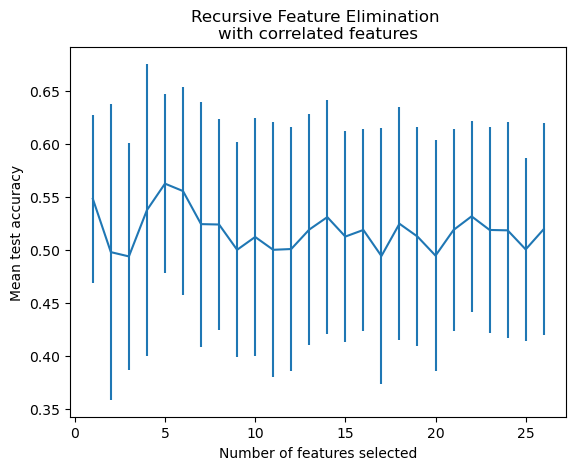

5
rfe_decisiontree_5


In [152]:
rfe_model_str = 'decisiontree'
rfe_decision_tree =  rfe_cv_feat_selector(X_df,rfe_model_str,num_folds)
feat_selector = f'rfe_{rfe_model_str}_{len(rfe_decision_tree)}'
print(len(rfe_decision_tree))
print(feat_selector)

With Logistic Regression classifier

c:\Users\madal\anaconda3\envs\ultraleap\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


Optimal number of features: 25
Selected features: ['num_events', 'mean_max_dist', 'sd_max_dist', 'coef_var_max_dist', 'slope_max_dist', 'decr_max_dist', 'max_open_vel', 'mean_open_vel', 'sd_open_vel', 'coef_var_open_vel', 'slope_open_vel', 'max_close_vel', 'mean_close_vel', 'sd_close_vel', 'coef_var_close_vel', 'slope_close_vel', 'mean_tap_dur', 'sd_tap_dur', 'coef_var_tap_dur', 'mean_rms', 'sd_rms', 'slope_rms', 'sum_rms', 'jerkiness', 'entropy']


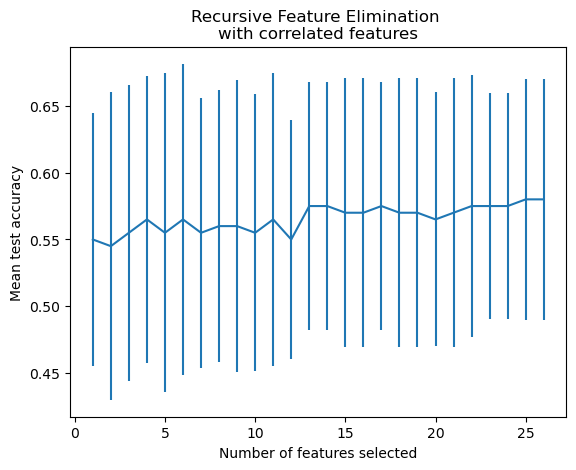

25
rfe_logit_25


In [285]:
rfe_model_str = 'logit'
rfe_logit =  rfe_cv_feat_selector(X_df,rfe_model_str,num_folds)
feat_selector = f'rfe_{rfe_model_str}_{num_folds}folds_{len(rfe_logit)}'
print(len(rfe_logit))
print(feat_selector)

In [286]:
X_df_norm = pd.DataFrame(data=X_norm, columns=X_df.iloc[:,1:].columns)
X_df = X_df_norm[rfe_logit]
X = X_df.values
len(X[0])

25

In [79]:
X_df_norm = pd.DataFrame(data=X_norm, columns=X_df.iloc[:,1:].columns)
X_df_norm
X_df = X_df_norm[rfe_randomforest]
X_df
X = X_df.values
len(X[0])

NameError: name 'X_norm' is not defined

In [94]:
num_feats = 3
rfe_model = 'logit'
feat_selector = f'rfe_{rfe_model}_{num_feats}'
X_norm = MinMaxScaler().fit_transform(X_df.iloc[:,1:]) # y = (x – min) / (max – min)
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_feats, step=1, verbose=5)
rfe_selector.fit(X_norm, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X_df.iloc[:,1:].loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
3 selected features


In [95]:
rfe_feature
X_df_norm = pd.DataFrame(data=X_norm, columns=X_df.iloc[:,1:].columns)
X_df_norm
X_df = X_df_norm[rfe_feature]
X_df
X = X_df.values
len(X[0])

3

Correlation Matrix
###### Feature selection based on correlation coefficients does not require scaling. Correlation is scale-invariant, which means it remains the same if all values of one or both of the variables are multiplied by a constant

In [261]:
importlib.reload(statis)
feat_selector = 'corr_matrix'
correlation_matrix = statis.plot_correlation_matrix(X_df, task, feat_file, to_save=False)
# define threshold for redundant features
threshold = 0.7

# np.where() gives a tuple with 2 arrays corresponding to (row, col), respectively
highly_corr_fts = np.where(
    np.logical_and(correlation_matrix > threshold, correlation_matrix != 1)
    )

# the abs function takes the absolute value of the correlation matrix, so any value 
# above 0.7, whether it's positive or negative, will be considered
# # highly_corr_fts = np.where(
# #     np.logical_and(abs(corr_matrix) > threshold, corr_matrix != 1)
# # )

corr_pairs = list(zip(highly_corr_fts[0], highly_corr_fts[1]))

pairs_name = []
for pair in corr_pairs:
    if pair[0] < pair[1]:
        print(f"Features '{correlation_matrix.columns[pair[0]]}' and '{correlation_matrix.columns[pair[1]]}' are highly correlated (correlation coefficient = {correlation_matrix.iloc[pair]})")
        pairs_name.append((correlation_matrix.columns[pair[0]],correlation_matrix.columns[pair[1]]))

feat_to_remove = set([pairs_name[i][1] for i in np.arange(len(pairs_name))])
feat_to_remove

# drop redundant features from X_df dataframe, leave out file name column and get X array
X = X_df.iloc[:,1:].drop(columns = feat_to_remove).values
X.shape[1]

Features 'num_events' and 'sum_rms' are highly correlated (correlation coefficient = 0.745844862321298)
Features 'mean_max_dist' and 'mean_open_vel' are highly correlated (correlation coefficient = 0.7916627915697892)
Features 'mean_max_dist' and 'mean_close_vel' are highly correlated (correlation coefficient = 0.7928298207455187)
Features 'mean_max_dist' and 'mean_rms' are highly correlated (correlation coefficient = 0.9172414310357759)
Features 'mean_max_dist' and 'sum_rms' are highly correlated (correlation coefficient = 0.8732693317332934)
Features 'slope_max_dist' and 'decr_max_dist' are highly correlated (correlation coefficient = 0.7622230555763894)
Features 'slope_max_dist' and 'slope_rms' are highly correlated (correlation coefficient = 0.7898987474686867)
Features 'max_open_vel' and 'mean_open_vel' are highly correlated (correlation coefficient = 0.9052636315907898)
Features 'max_open_vel' and 'sd_open_vel' are highly correlated (correlation coefficient = 0.8592439810995275)


14

### 3. Data splitting, create training and test data
### Train Classifiers

In [262]:
importlib.reload(pred)
ls_model = ['neuralnet','linearsvm','nonlinearsvm', 'logit','randomforest','kneighbors','gaussiannaivebayes']
ls_binary = [True,False]
ls_cvlabel = ['skf', 'logocv']
# ls_cvlabel = ['skf', 'logocv', 'loocv']

for model in ls_model: 
    for cl in ls_binary:
        for cv in ls_cvlabel:
            if cv=='logocv':
                group_int=group_int
            pred.classifier(task, feat_selector, feat_file, cv, model, X, y, binary = cl, group_int=group_int)

1/1 [==============================] - 0s 13ms/step


c:\Users\madal\anaconda3\envs\ultraleap\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(


2/2 [==============================] - 0s 2ms/step


c:\Users\madal\Projects\Thesis\ultraleap_analysis\code\sig_processing\predict.py:105: RuntimeWarning: invalid value encountered in divide
  prec = np.diag(cm) / np.sum(cm, axis=0)


1/1 [==============================] - 0s 14ms/step


c:\Users\madal\Projects\Thesis\ultraleap_analysis\code\sig_processing\predict.py:105: RuntimeWarning: invalid value encountered in divide
  prec = np.diag(cm) / np.sum(cm, axis=0)
c:\Users\madal\anaconda3\envs\ultraleap\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\madal\anaconda3\envs\ultraleap\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\madal\anaconda3\envs\ultraleap\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\madal\anaconda3\envs\ultraleap\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\madal\anaconda3\envs\ultraleap\lib\site-packages\sklearn\svm\_b

### 4. Create Tables w/ Results 

In [263]:
task = 'ft'
ls_model = ['neuralnet','linearsvm','nonlinearsvm', 'logit','randomforest','kneighbors','gaussiannaivebayes']
# ls_class = ['binary', 'multiclass']
cl = 'binary'
cvlabel = 'logocv'
all_data = pd.DataFrame()

for model in ls_model:
    # for cl in ls_class:
    read_metrics = pd.read_excel(os.path.join(repo_path,'modelling', feat_file, task, feat_selector, cl, cvlabel, model, f'{task}_{feat_selector}_{cl}_{cvlabel}_{model}_metrics.xlsx'), index_col=0)
    read_metrics = read_metrics.transpose()
    read_metrics['model'] = model

    all_data = all_data.append(read_metrics)
    

all_data.set_index('model', inplace=True)
all_data.index.name = None

path_metrics_total = os.path.join(repo_path, 'modelling', feat_file, task, feat_selector, cl, cvlabel)
if not os.path.exists(path_metrics_total):
    os.makedirs(path_metrics_total)
all_data.to_excel(os.path.join(path_metrics_total, f'{task}_{feat_selector}_{cl}_{cvlabel}_metrics_total.xlsx'))
all_data


C:\Users\madal\AppData\Local\Temp\ipykernel_41024\598559144.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(read_metrics)
C:\Users\madal\AppData\Local\Temp\ipykernel_41024\598559144.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(read_metrics)
C:\Users\madal\AppData\Local\Temp\ipykernel_41024\598559144.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(read_metrics)
C:\Users\madal\AppData\Local\Temp\ipykernel_41024\598559144.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(read_metrics)
C:\Users\madal\AppData\Local

,Accuracy,Precision_0,Precision_1,Recall_0,Recall_1,F1_0,F1_1
neuralnet,0.645,0.606061,0.720588,0.808081,0.485149,0.692641,0.579882
linearsvm,0.590,0.600000,0.582609,0.515152,0.663366,0.554348,0.620370
nonlinearsvm,0.535,0.519231,0.590909,0.818182,0.257426,0.635294,0.358621
logit,0.705,0.704082,0.705882,0.696970,0.712871,0.700508,0.709360
randomforest,0.665,0.650943,0.680851,0.696970,0.633663,0.673171,0.656410
kneighbors,0.480,0.478261,0.482353,0.555556,0.405941,0.514019,0.440860
gaussiannaivebayes,0.640,0.594406,0.754386,0.858586,0.425743,0.702479,0.544304


#############################################################

ROC curve

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.linear_model import LogisticRegression

# Assuming you have X (input features), y (target variable), and groups (group labels)
# Replace them with your own data

# Initialize the LeaveOneGroupOut cross-validator
logo = LeaveOneGroupOut()

# Initialize lists to store true labels and predicted probabilities for all folds
true_labels = []
pred_probs = []

# Iterate over each fold
for train_index, test_index in logo.split(X, y, groups):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit your classifier (e.g., Logistic Regression) on the training data
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    # Predict the probabilities for the test data
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    # Store true labels and predicted probabilities for this fold
    true_labels.extend(y_test)
    pred_probs.extend(y_pred_prob)

# Compute the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(true_labels, pred_probs)

# Compute the AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
